# The Sparks Foundation 

# Task-3 : Exploratory Data Analysis -Terrorism(Level - Intermediate) 

## Author : Kishlay Kumar

### PROBLEM :In this task, we will be performing exploratory data analysis on the dataset "GlobalTerrorism" and try to find out the hot zone of terrorism. Also, we will derive the security issues and various insight

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [256]:
terrorist_data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='cp1252', low_memory=False)
terrorist_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Null values before Cleaning

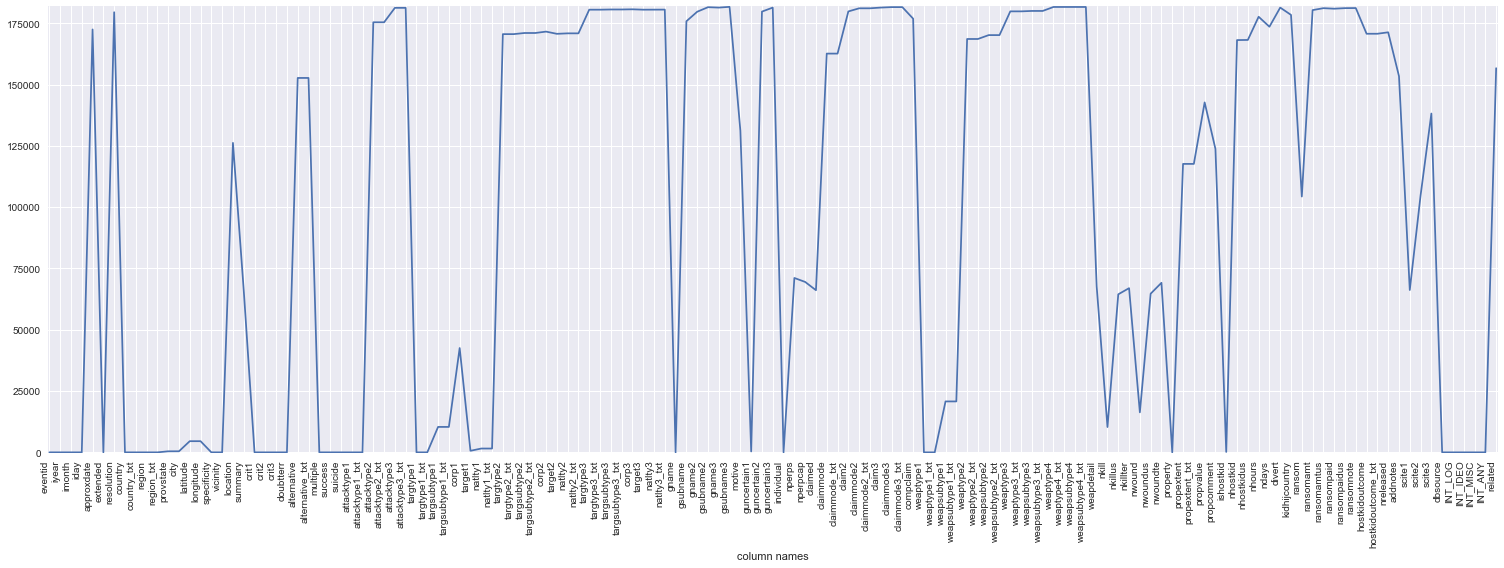

In [257]:
null_df = terrorist_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
plt.figure(figsize=(21,8))
plt.plot(null_df.index, null_df['count'])
plt.xticks(null_df.index, null_df.index, rotation=90,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(.001)
plt.tight_layout()
plt.show()

In [258]:
terrorist_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [259]:
terrorist_data.shape

(181691, 135)

In [260]:
terrorist_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 631.6 MB


# Handling Null Values

### Dropping Rows having more than 60 percent of values null

In [261]:
total_columns = terrorist_data.shape[1]

#Percentage_of_missing_values_in_rows
null_values = terrorist_data.isna().sum(axis=1)/total_columns*100

null_values.sort_values(ascending=False).head(20)

20969    70.370370
16777    69.629630
29887    69.629630
29424    69.629630
19310    69.629630
64159    69.629630
29652    69.629630
29819    69.629630
56966    69.629630
65095    69.629630
56964    69.629630
56965    69.629630
7193     68.888889
24129    68.888889
19306    68.888889
23611    68.888889
11078    68.888889
35342    68.888889
15304    68.888889
9709     68.888889
dtype: float64

In [262]:
#index of rows which having missing values greater than 60 percentage
m_index = list(terrorist_data.loc[null_values>60].index)

#Dropping rows which have missing values greater than 60 percentage
terrorist_data = terrorist_data.drop(m_index)

In [263]:
terrorist_data.shape

(122146, 135)

### Deleting Columns if they have above 75% null values

In [264]:
total_rows=terrorist_data.shape[0]

#displaying the percentage of missing values in the columns
null_val = (terrorist_data.isnull().sum()/total_rows)*100

null_val.sort_values(ascending=False).head(20)

gsubname3           99.983626
weapsubtype4        99.942692
weapsubtype4_txt    99.942692
weaptype4           99.940235
weaptype4_txt       99.940235
claimmode3          99.891114
claimmode3_txt      99.891114
gsubname2           99.869009
divert              99.755211
claim3              99.739656
guncertain3         99.738837
gname3              99.735562
attacktype3_txt     99.649600
attacktype3         99.649600
ransomnote          99.579192
ransompaidus        99.548900
ransomamtus         99.539076
claimmode2          99.495685
claimmode2_txt      99.495685
ransompaid          99.389255
dtype: float64

In [265]:
total = terrorist_data.shape[0]
del_ = []
for i in terrorist_data.columns:
    if (terrorist_data[i].isnull().sum()/total)*100>75:
        del_.append(i)
        
terrorist_data = terrorist_data.drop(del_,axis=1)

In [266]:
terrorist_data.shape

(122146, 66)

# Handling Unique Values

In [267]:
# checking unique values in the columns
terrorist_data.nunique().sort_values(ascending = False).head(10)

eventid      122146
summary      112165
scite1        83817
scite2        62246
target1       54789
location      44075
latitude      41013
longitude     40667
scite3        36083
city          28695
dtype: int64

In [268]:
# splitting summary column
terrorist_data[['date', 'summary']] = terrorist_data['summary'].str.split(':', 1, expand=True)

In [269]:
terrorist_data.shape

(122146, 67)

In [270]:
all_columns = terrorist_data.columns
# store numerical and categorical column in two different variables.
num_col = terrorist_data._get_numeric_data().columns
cat_col = list(set(all_columns)-set(num_col))
terrorist_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.221460e+05,122146.000000,122146.000000,122146.000000,122146.000000,122146.000000,122146.000000,121040.000000,121040.000000,122140.000000,...,115574.00000,111575.000000,122146.000000,50950.000000,3.168800e+04,121968.000000,122146.000000,122146.000000,122146.000000,122146.000000
mean,2.010170e+11,2010.104064,6.462643,15.542335,0.066159,125.016857,7.795065,25.911202,45.414055,1.448232,...,0.02896,0.106977,-1.164893,3.261178,1.257940e+05,0.072002,-4.897058,-4.794975,0.078889,-4.388658
std,8.392796e+08,8.392532,3.388081,8.815515,0.248560,97.870253,2.590359,14.355153,44.607586,0.915742,...,2.11095,1.494330,3.628592,0.470811,8.057061e+06,0.547719,4.518504,4.639537,0.355605,4.702063
min,1.970010e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-42.884049,-157.858333,1.000000,...,0.00000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.008121e+11,2008.000000,4.000000,8.000000,0.000000,92.000000,6.000000,14.091462,35.055773,1.000000,...,0.00000,0.000000,0.000000,3.000000,-9.900000e+01,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.013082e+11,2013.000000,6.000000,15.000000,0.000000,96.000000,8.000000,32.306099,44.375465,1.000000,...,0.00000,0.000000,0.000000,3.000000,-9.900000e+01,0.000000,-9.000000,-9.000000,0.000000,-9.000000
75%,2.015073e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.346722,70.463646,1.000000,...,0.00000,0.000000,1.000000,4.000000,-9.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,650.00000,200.000000,1.000000,4.000000,1.079120e+09,1.000000,1.000000,1.000000,1.000000,1.000000


## Null Values after Cleaning

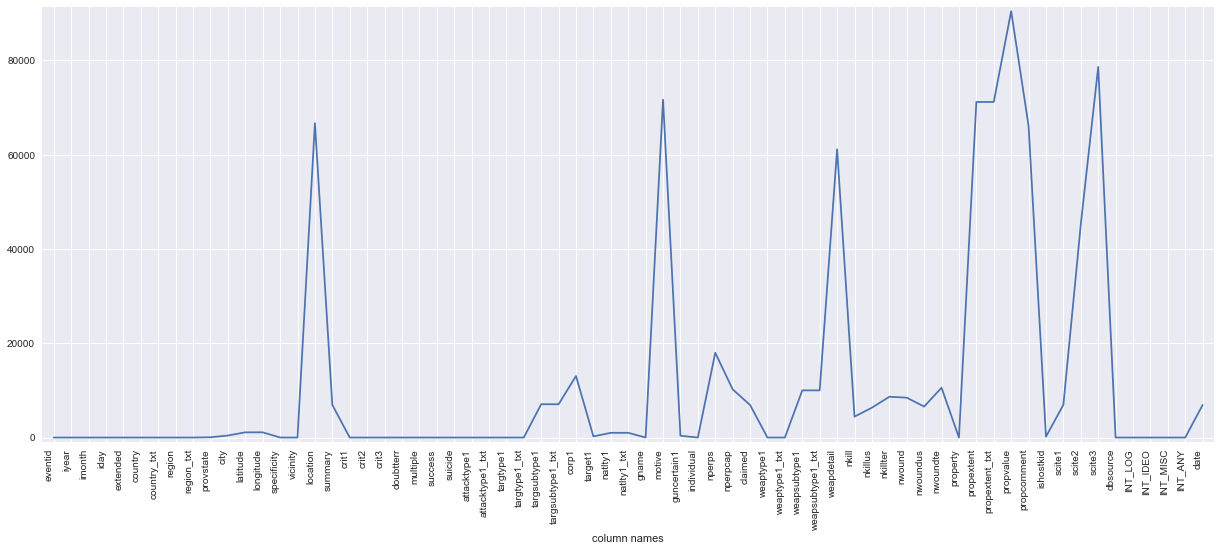

In [271]:
null_df = terrorist_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
plt.figure(figsize=(21,8))
plt.plot(null_df.index, null_df['count'])
plt.xticks(null_df.index, null_df.index, rotation=90,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

# Data Visualization

### Value_Counts of Numerical Columns

In [272]:
# for i in num_col:
#     if i in []:
#         continue
#     plt.figure(figsize=(20, 9))
#     chart = sns.countplot(
#              data=terrorist_data,
#              x=i,
#              palette='Set1',
# # This option plot top category of numerical values.
#              order=pd.value_counts(terrorist_data[i]).iloc[:10].index
#            )
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show()

### Value_Counts of Categorical Columns

In [273]:
# for i in cat_col:
#     if i in []:
#         continue
#     plt.figure(figsize=(20, 9))
#     chart = sns.countplot(
#              data=terrorist_data,
#              x=i,
#              palette='Set1',
# # This option plot top category of numerical values.
#              order=pd.value_counts(terrorist_data[i]).iloc[:10].index
#            )
#     chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#     plt.show()

## Top 20 worst terrorist attacks

<AxesSubplot:xlabel='iyear', ylabel='country'>

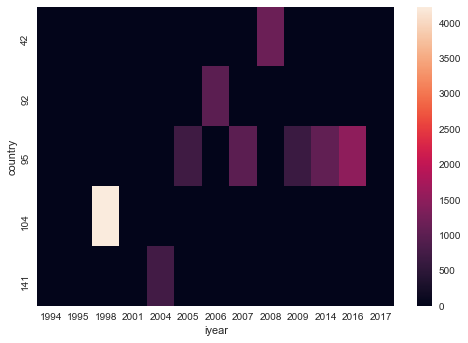

In [274]:
terrorist_data['nwound'] = terrorist_data['nwound'].fillna(0).astype(int)
terrorist_data['nkill'] = terrorist_data['nkill'].fillna(0).astype(int)
terrorist_data['Casualities'] = terrorist_data['nkill'] + terrorist_data['nwound']
terrorist_data1 = terrorist_data.sort_values(by='Casualities',ascending=False)[:20]
heat=terrorist_data1.pivot_table(index='country',columns='iyear',values='Casualities')
heat.fillna(0,inplace=True)
sns.heatmap(heat.head())

## Terrorist Attacks in Years

In [275]:
year = terrorist_data['iyear'].unique()     
attack_count = terrorist_data['iyear'].value_counts()

Text(0, 0.5, 'Attack count')

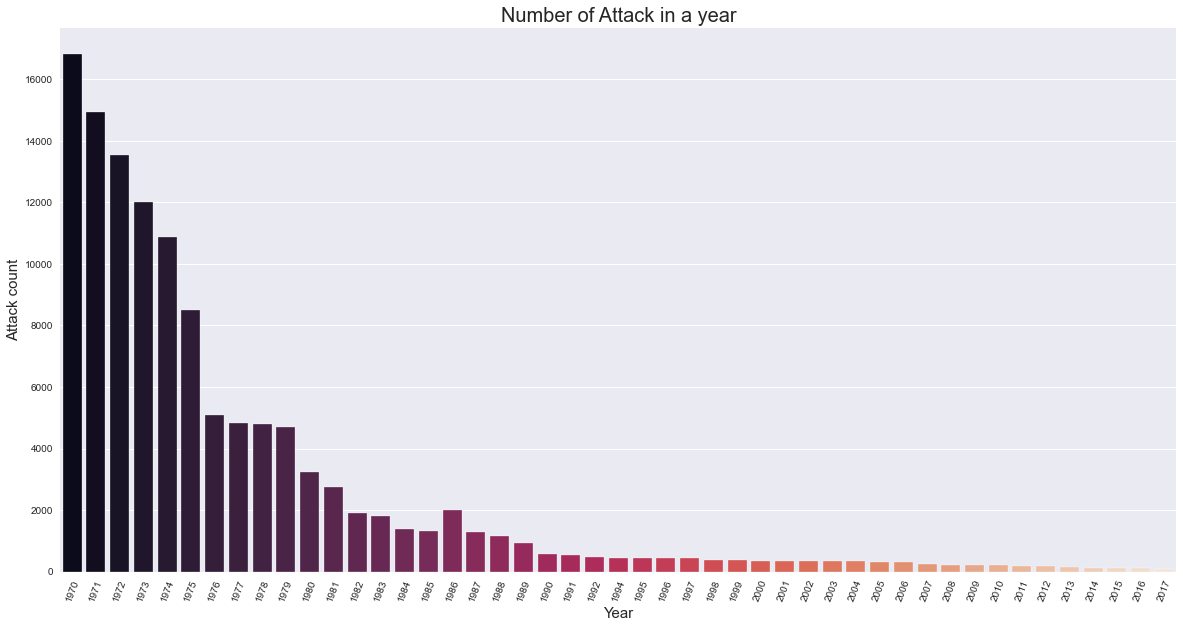

In [276]:
plt.figure(figsize=(20,10))
sns.barplot(x = year, y = attack_count, palette = 'rocket')
plt.xticks(rotation = 69)
plt.title('Number of Attack in a year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Attack count', fontsize=15)

## Top Affected Countries with Terrorist Activities

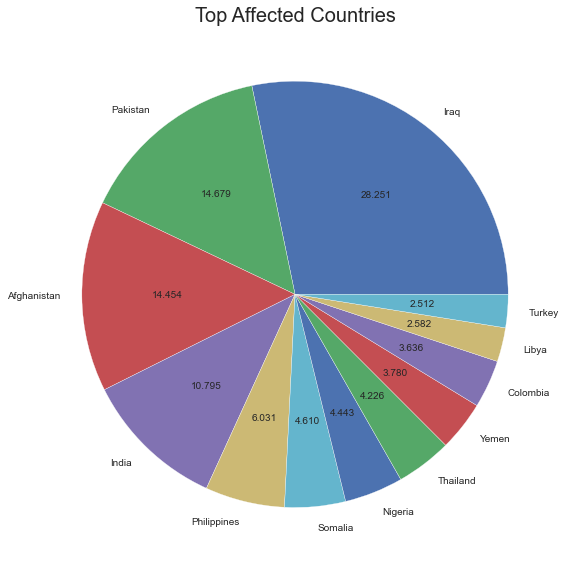

In [277]:
terrorist_data.country_txt.value_counts()[:12].plot(kind='pie',figsize=(8,8),autopct='%.3f')
plt.title('Top Affected Countries',fontsize=20)
plt.ylabel('')
plt.tight_layout()
plt.show()

# Top Affected Regions with Terrorist Activities

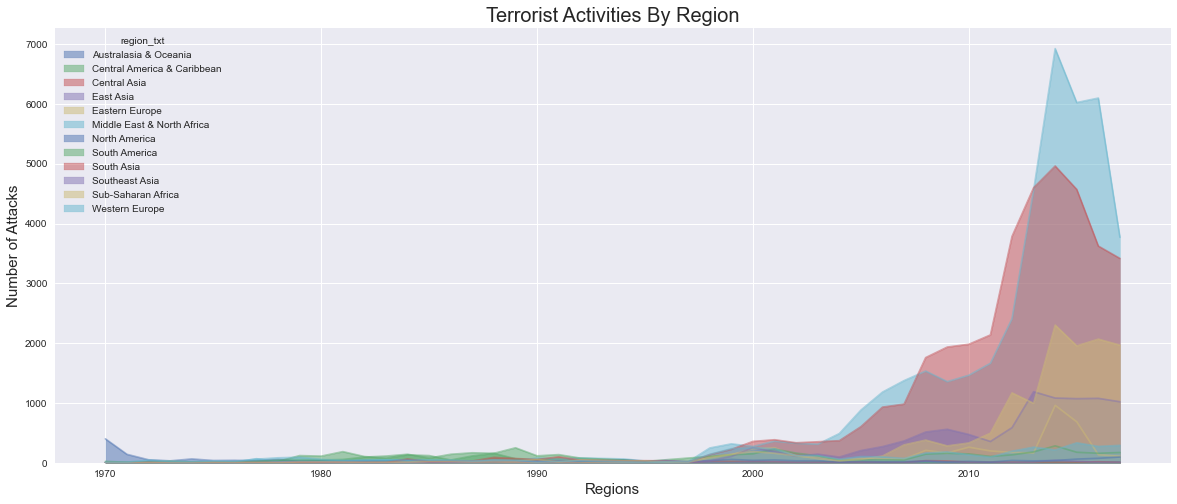

In [278]:
sns.set_style('darkgrid')
pd.crosstab(terrorist_data.iyear, terrorist_data.region_txt).plot(kind='area',stacked = False,figsize=(20,8))
plt.title('Terrorist Activities By Region', fontsize = 20)
plt.ylabel('Number of Attacks', fontsize=15)
plt.xlabel('Regions',fontsize=15)
plt.show()

## Top Cities Affected 

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


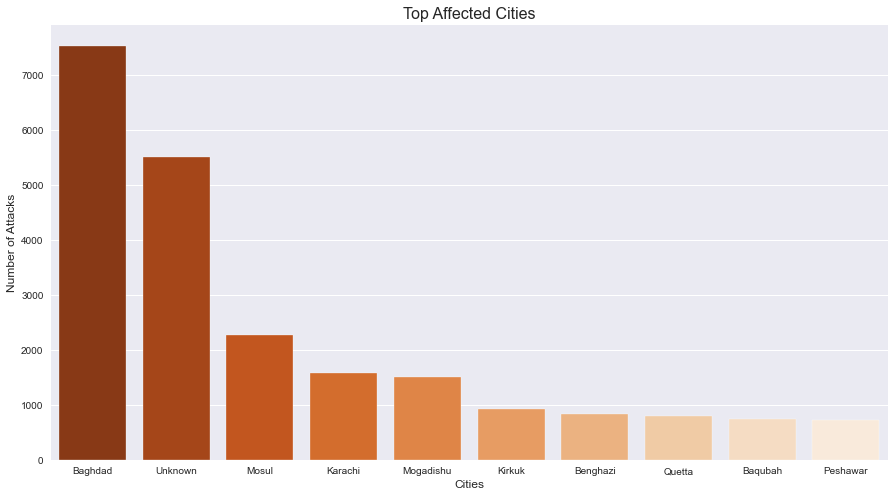

In [279]:
plt.subplots(figsize=(15,8))
sns.barplot(terrorist_data.city.value_counts()[:10].index,terrorist_data.city.value_counts()[:10].values,palette='Oranges_r')
plt.title('Top Affected Cities', fontsize = 16)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xlabel('Cities',fontsize=12)
plt.show()

## Terrorist Activities On Particular Date

<AxesSubplot:>

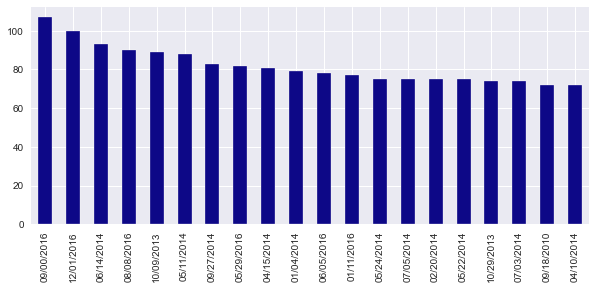

In [289]:
terrorist_data.date.value_counts()[:20].plot(kind='bar',figsize=(10,4),cmap='plasma')

## Number of Kills per Year

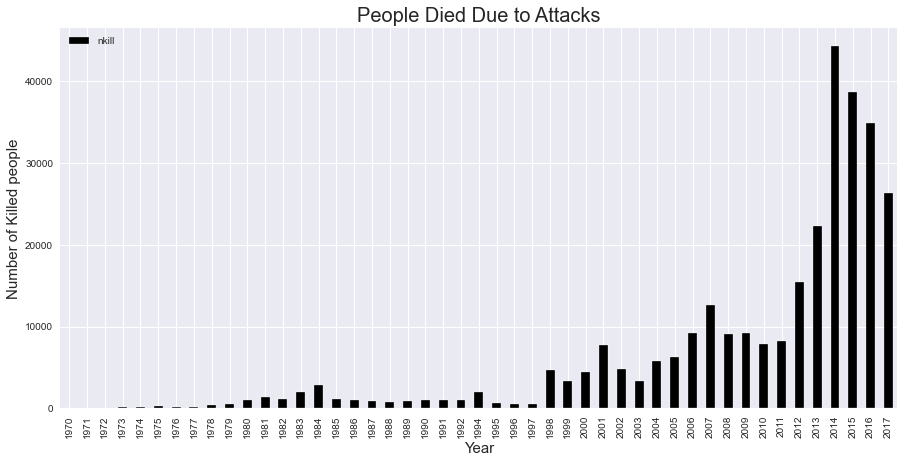

In [288]:
terrorist_data[['iyear','nkill']].groupby(['iyear']).sum().plot(kind='bar',figsize=(15,7),color='black')
plt.title('People Died Due to Attacks',fontsize=20)
plt.ylabel('Number of Killed people',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.show()

## Types of Categories Affected

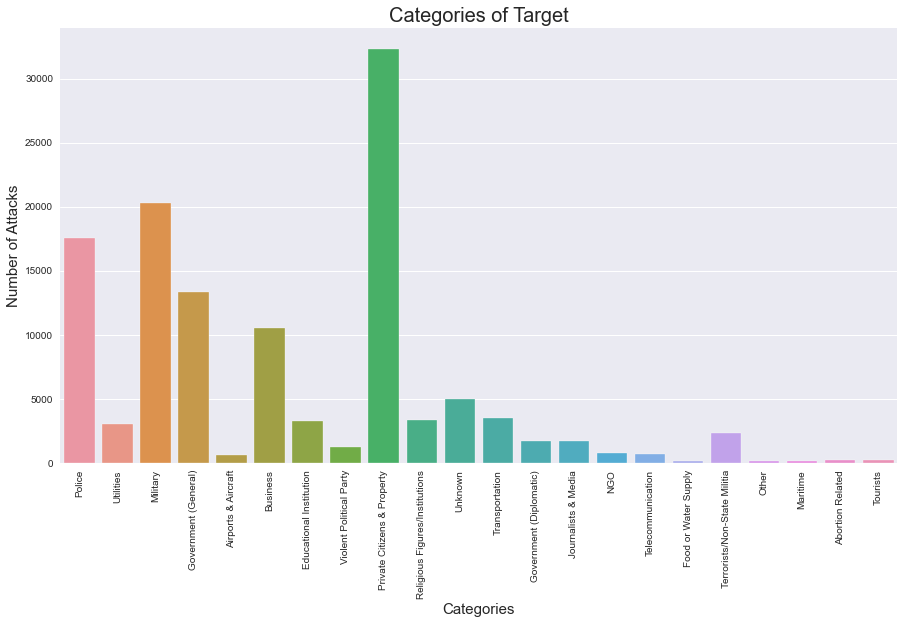

In [284]:
plt.figure(figsize=(15,8))
sns.countplot(x='targtype1_txt',data=terrorist_data)
plt.title('Categories of Target',fontsize=20)
plt.xlabel('Categories',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

## Types of Weapons used in Attacks

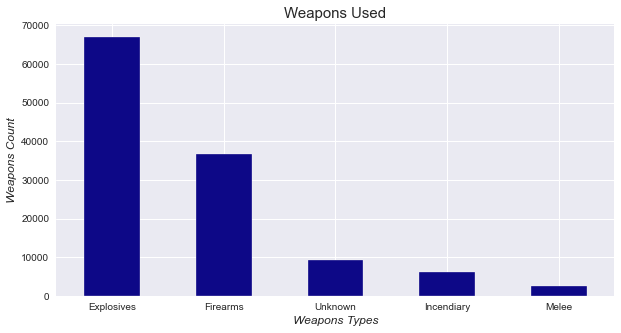

In [285]:
terrorist_data['weaptype1_txt'].value_counts()[:5].plot(kind='bar',figsize=(10,5),colormap='plasma')
plt.title('Weapons Used',fontsize=15)
plt.xlabel('Weapons Types',fontsize=12,fontstyle='italic')
plt.ylabel('Weapons Count',fontsize=12,fontstyle='oblique')
plt.xticks(rotation=0)
plt.show()

## Due to Which types of attacks Peoples Died the most 

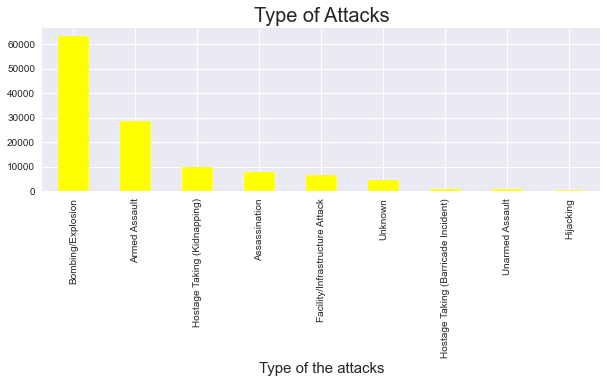

In [286]:
terrorist_data.attacktype1_txt.value_counts().plot(kind='bar',figsize=(10,3),color = 'yellow')
plt.title('Type of Attacks',fontsize = 20)
plt.xlabel('Type of the attacks',fontsize = 15)
plt.show()


## Top 10 Terrorist Groups

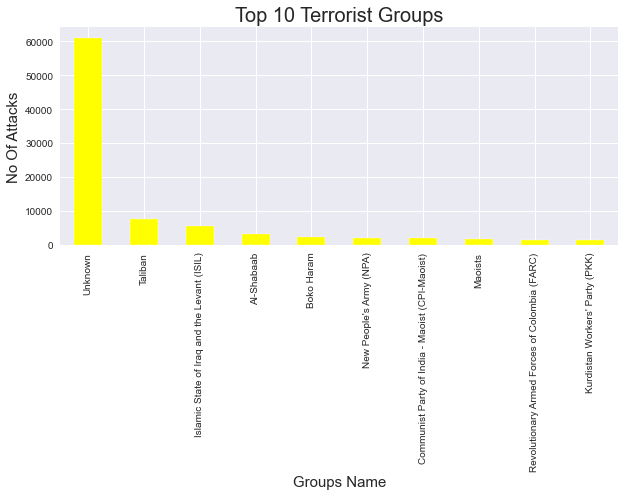

In [287]:
terrorist_data.gname.value_counts()[0:10].plot(kind='bar',figsize=(10,4),color='yellow')
plt.title('Top 10 Terrorist Groups',fontsize = 20)
plt.xlabel('Groups Name',fontsize = 15)
plt.ylabel('No Of Attacks',fontsize = 15)
plt.show()

# Conclusion :-

From the above graphs, we can see that the countries where most people are affected are : Afghanisthan, Iraq, India. We can see that terrorist attacks according to global terrorism data started rising after 2000 and is continuously rising Even though there is a perception that Muslims are supporters of terrorism, but Muslims are the people who are most damaged by terrorist attacks.

Private Citizens and Military are most affected by such Terrorist Attacks.

Hot Zones of Terrorism are:

Most Attacked Year: 1970

Most Attacked Region: 'Middle East & North Africa' followed by 'South Asia'

Most Attacked Country: Iraq

Year with highest deaths: 2014

Region with highest deaths: Southeast Asia

City with highest deaths and casualities: Baghdad

Most Attack types: Bombing/Explosion

Most Attack targets: Private property & Citizens

Most Popular weapon used for attacks: Explosion

Terrorist group with most attacks and kills: Taliban